In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [24]:
df['species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}, inplace=True)
df

/tmp/ipython-input-3785721794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}, inplace=True)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
print(df.info())
print(df.describe())
print(df['species'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

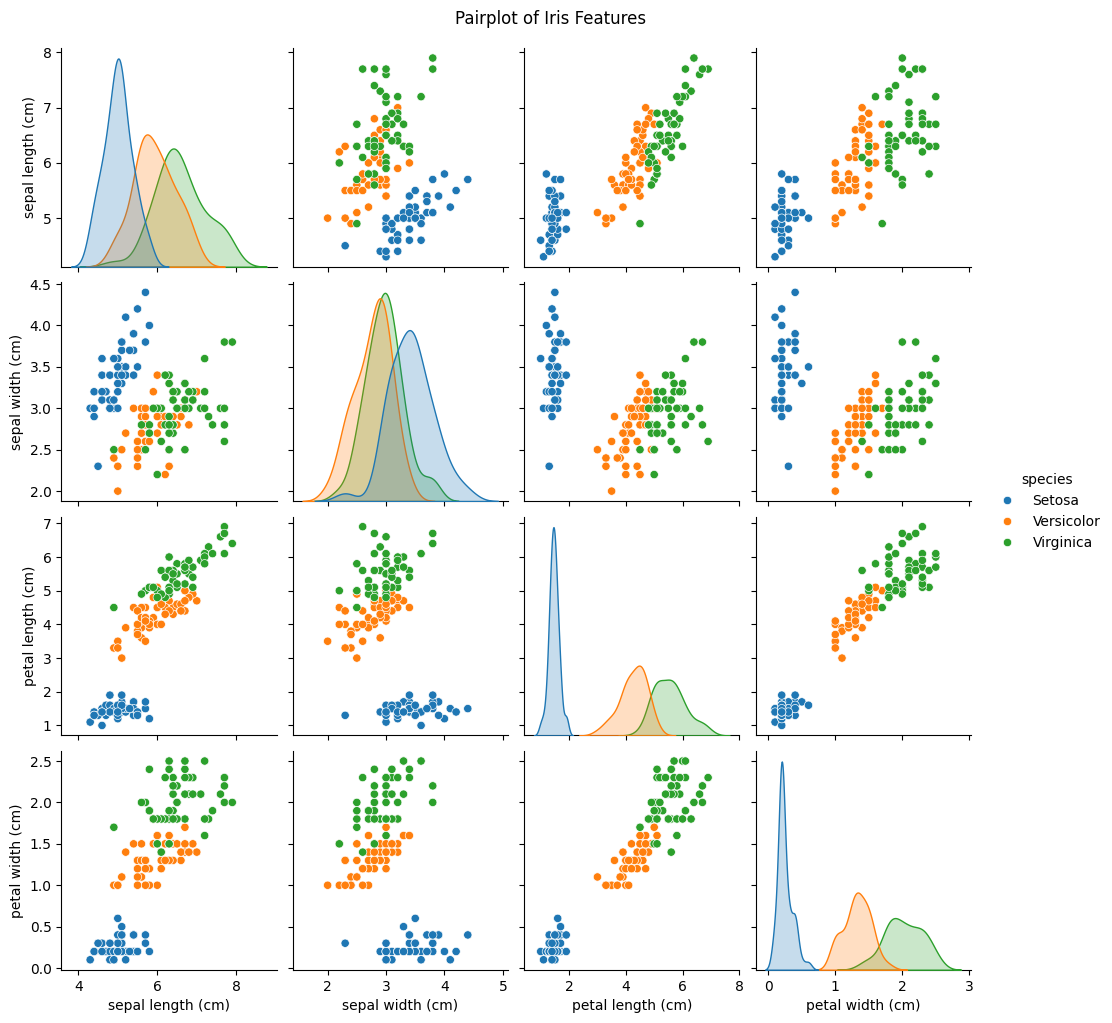

In [8]:
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

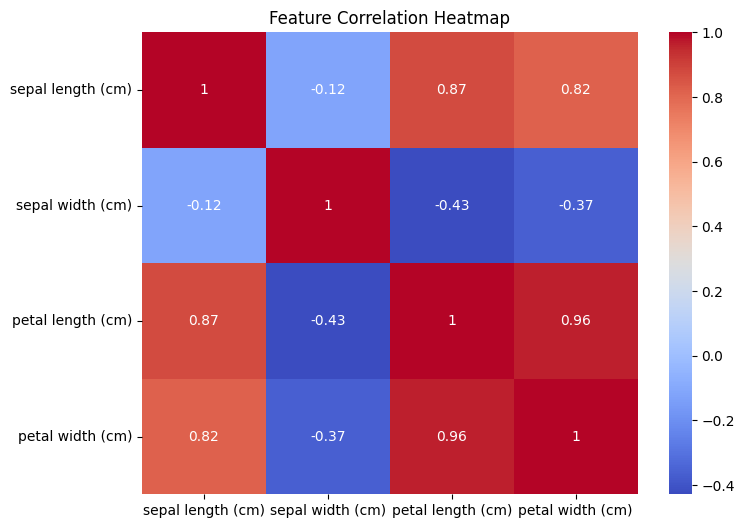

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('species', axis=1).corr(),
            annot=True,
            cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

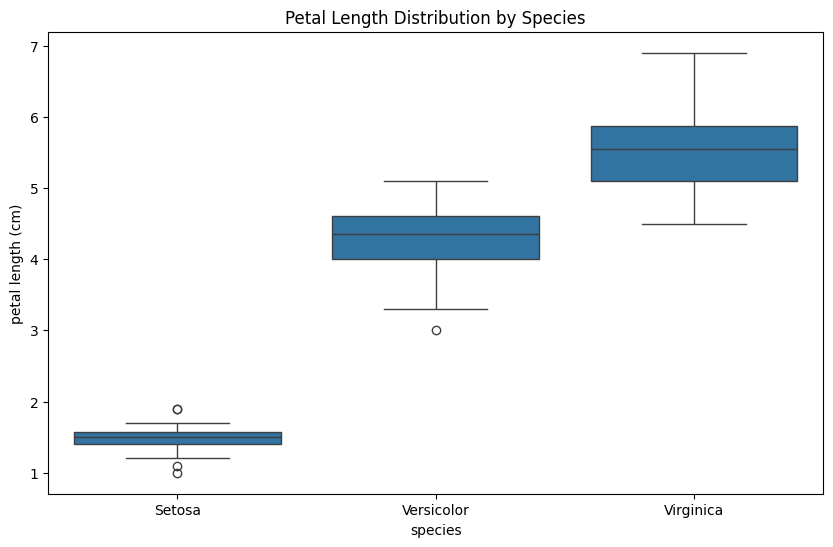

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title("Petal Length Distribution by Species")
plt.show()

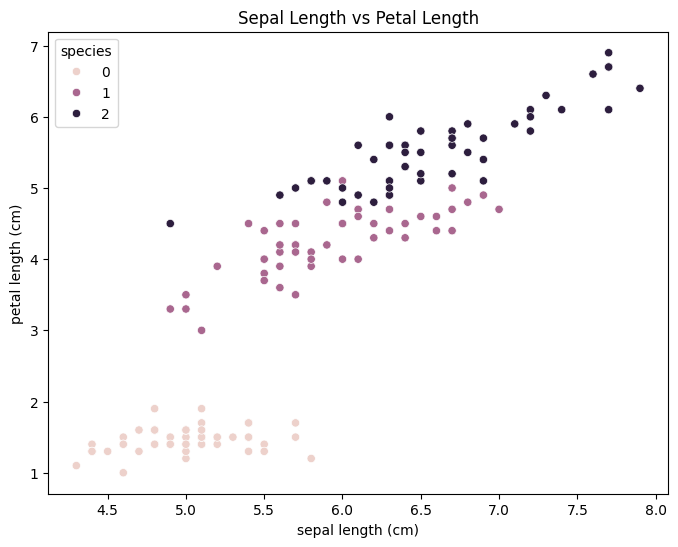

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sepal length (cm)',
                y='petal length (cm)',
                hue='species',
                data=df)

plt.title("Sepal Length vs Petal Length")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], df['species'], test_size=0.2)

In [34]:
print("Xtrain lenght: ", len(x_train))
print("Xtest lenght: ", len(x_test))
print("ytrain lenght: ", len(y_train))
print("ytest lenght: ", len(y_test))

Xtrain lenght:  120
Xtest lenght:  30
ytrain lenght:  120
ytest lenght:  30


In [35]:
# Check the shape of xtrain and xtest -> must (a, 1)
print("Xtrain shape: ",x_train.shape)
print("Xtest shape: ", x_test.shape)
print("ytrain shape: ",y_train.shape)
print("ytest shape: ", y_test.shape)

Xtrain shape:  (120, 4)
Xtest shape:  (30, 4)
ytrain shape:  (120,)
ytest shape:  (30,)


In [37]:
from sklearn.linear_model import LogisticRegression

# Creating object of Logistic Regression
lr = LogisticRegression()

In [38]:
lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
lr.predict(x_test)

lr.predict([[8.1,4.8,2.5,1.3]])

y_pred = lr.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
lr.score(x_test, y_test)

0.9666666666666667

In [41]:
accuracy = accuracy_score(y_test, y_pred)

print("===== Model Performance =====")
print(f"Accuracy       : {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

===== Model Performance =====
Accuracy       : 96.67%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



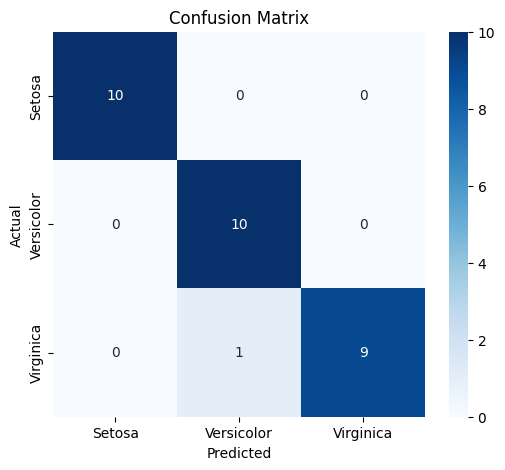

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()